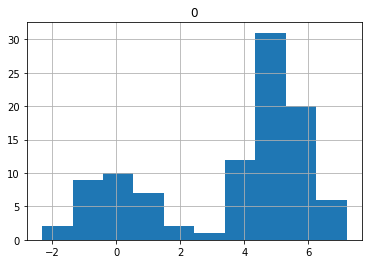

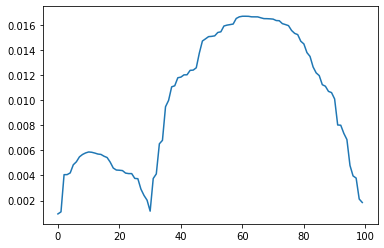

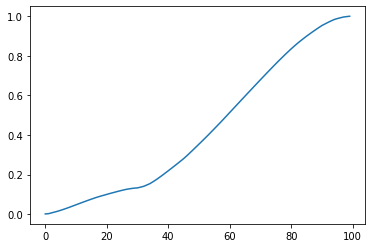

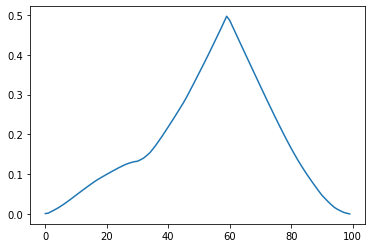

In [20]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

#all_data = pd.read_csv('/mnt/distvol/states.csv')
x = make_data(100)
pd.DataFrame(x).hist()
plt.show()
x = x[x.argsort()]

bandwidths = 10 ** np.linspace(-1, 1, 25)
#bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
grid.fit(x[:, None]);
grid.best_params_
# score_samples returns the log of the probability density

kde = KernelDensity(kernel='gaussian', bandwidth=grid.best_params_['bandwidth']).fit(x[:, None])
plt.plot(((np.exp(kde.score_samples(x[:, None])))/sum((np.exp(kde.score_samples(x[:, None]))))))
plt.show()
plt.plot(np.cumsum((np.exp(kde.score_samples(x[:, None])))/sum((np.exp(kde.score_samples(x[:, None]))))))
plt.show()
np.mean(np.cumsum((np.exp(kde.score_samples(x[:, None])))/sum((np.exp(kde.score_samples(x[:, None]))))))

values = (np.cumsum((np.exp(kde.score_samples(x[:, None])))/sum((np.exp(kde.score_samples(x[:, None]))))))

for i in range(0,len(values)):
    if values[i] >= .5:
        values[i] = 1 - values[i]
        
    
plt.plot(values)
plt.show()